# DataMapPlot Colour Options

This notebook will walk you through some of the colour specific customization options that are available in DataMapPlot. There are many options, so this notebook will instead highlight some of the major options and hint at the further customization that can be achieved with respect to them. To get started we'll need to import DataMapPlot. Also, for the purposes of this documentation, I need to keep the image sizes smaller to fit in readthedocs; because of that I will set the global DPI for matplotlib (which DataMapPlot uses for plotting), but you should probably remove those lines if you are running this notebook yourself.

In [1]:
# Ensure we don't generate large images for inline docs
# You probably want to remove this if running the notebook yourself
import matplotlib
matplotlib.rcParams["figure.dpi"] = 72

import datamapplot

To demonstrate what DataMapPlot can do we'll need some data. The examples directory of the DataMapPlot repository contains some pre-prepared datasets for experimenting with. We'll grab one of those. In practice we need a data map -- as set of 2d coordinates, one per data sample we are mapping -- and a set of labels idenityfing the "topic" of a data sample, usually based on clusters in the data map. In this case we'll use a data map derived from the CORD-19 dataset -- a dataset of papers and scientific articles related to COVID-19 that was curated by Allen AI.

In [2]:
import numpy as np
import requests
import io

data_map_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/CORD19-subset-data-map.npy"
)
cord19_data_map = np.load(io.BytesIO(data_map_file.content))
label_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/CORD19-subset-cluster_labels.npy"
)
cord19_labels = np.load(io.BytesIO(label_file.content), allow_pickle=True)

Let's start by making the most basic DataMapPlot output based on this data so we have an idea of what the starting point looks like, and can better understand what the various customizations we will be applying can do for us.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

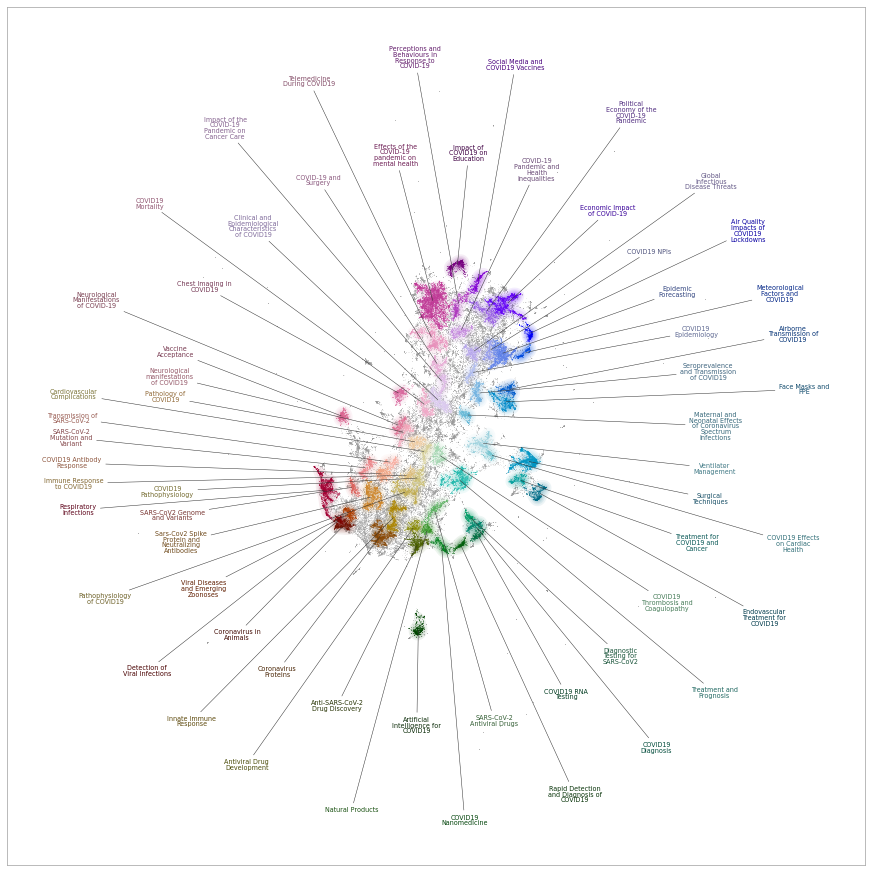

In [3]:
datamapplot.create_plot(cord19_data_map, cord19_labels)

By default DataMapPlot colours the text labels to match with the associated clusters in the data map. This can be useful doe distinguishing the different labels, and making the cluster associations, but can be distracting. We can turn that off by setting ``color_text_label`` to ``False``.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

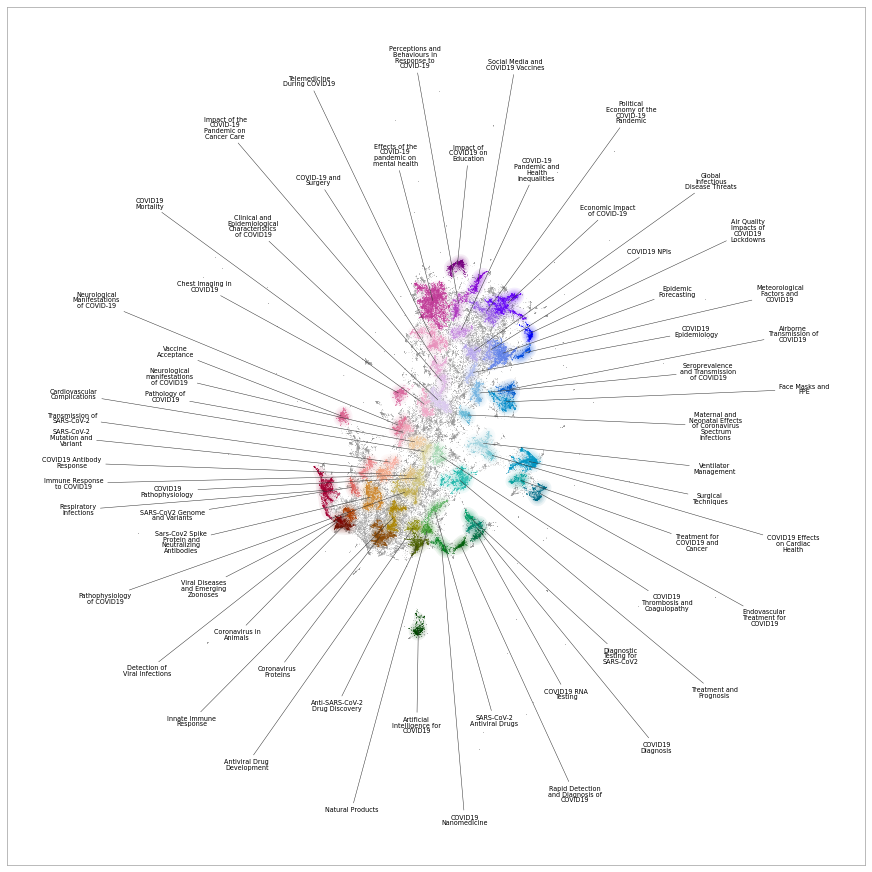

In [4]:
datamapplot.create_plot(cord19_data_map, cord19_labels, color_label_text=False)

Darkmode is also often useful, particularly for fitting in with presentations that already have a dark theme. DataMapPlot has a darkmode built in that tries to take care of most of the issues asscociated to changing to a dark background, such as using more pastel, rather than darker, versions of the cluster colours for palette labels, using white indicator lines by default, and handling changes to title and sub-title colours automatically. You can enable all of this with a switch via ``darkmode=True``.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

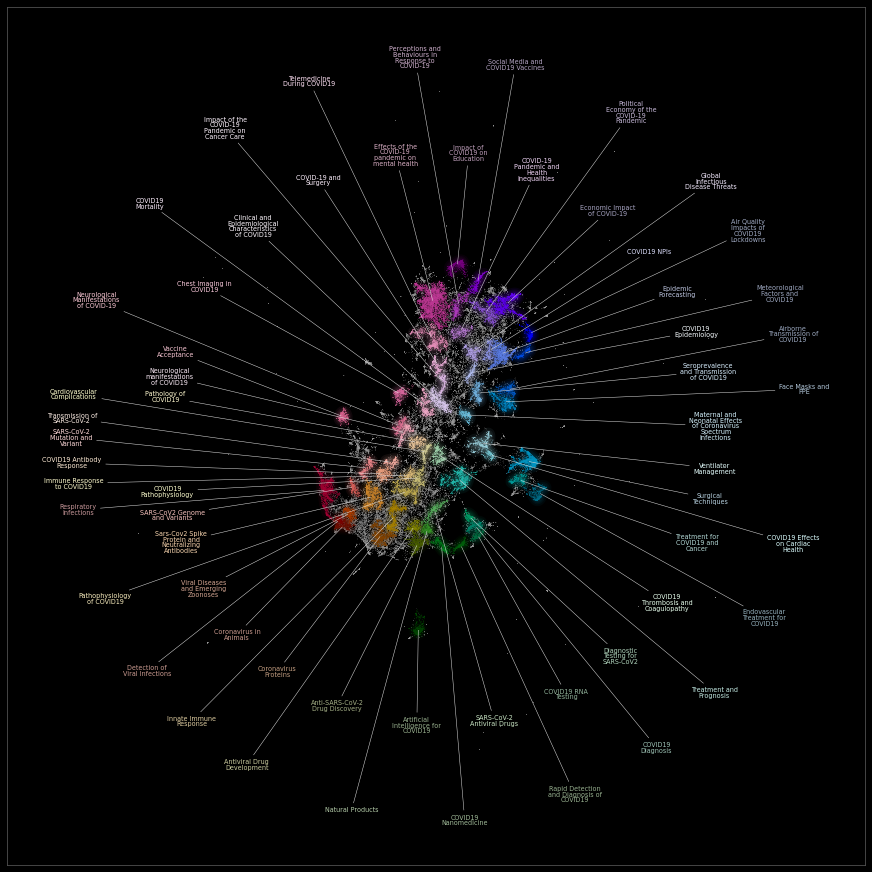

In [5]:
datamapplot.create_plot(cord19_data_map, cord19_labels, darkmode=True)

DataMapPlot generates a default color palette designed to have nearby clusters have similar colours. It is possible to replace this colour generated palette with your own, as we'll see later, but for now let's look at some of the options for tweaking this auto-generated colour palette. By default red hue end up at the left, or west, side of the map. You can shift this around via the ``palette_hue_shift`` which takes an argument, in degrees clockwise, of how far to shift the hue of the palette around. For example, if we shift the hue by ``-90`` we will end up with the red hues at the bottom, or south, side of the map.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

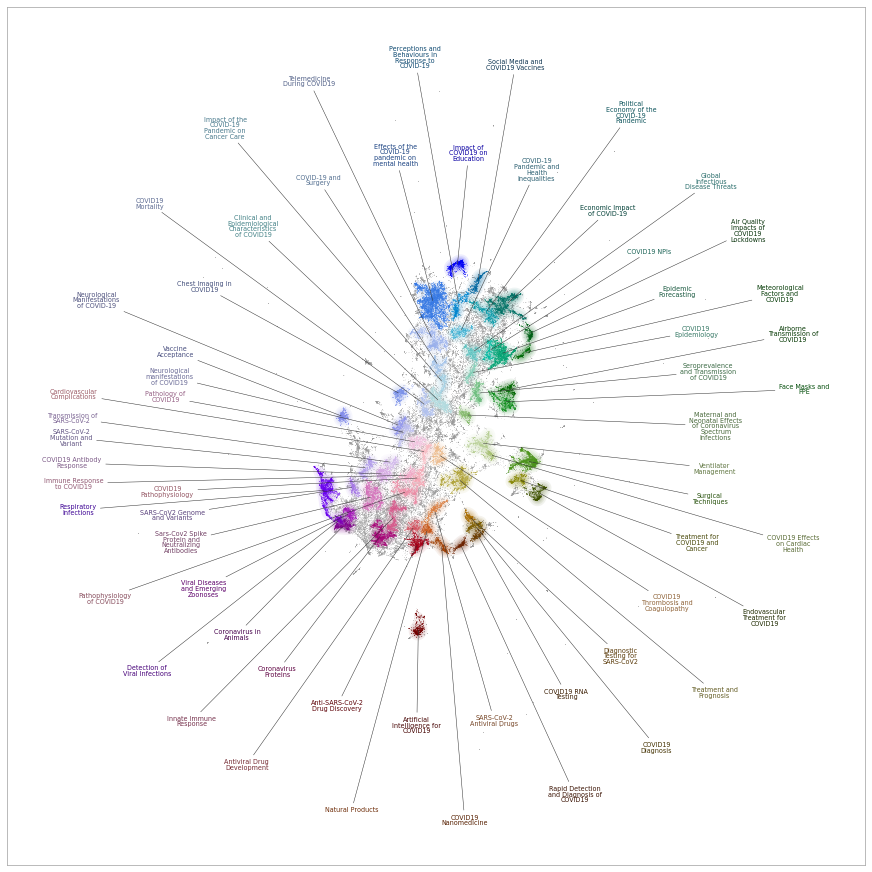

In [6]:
datamapplot.create_plot(cord19_data_map, cord19_labels, palette_hue_shift=-90)

Alternatively we can spin the palette around by 160 degrees to put red hues in the east-north-east side of the map.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

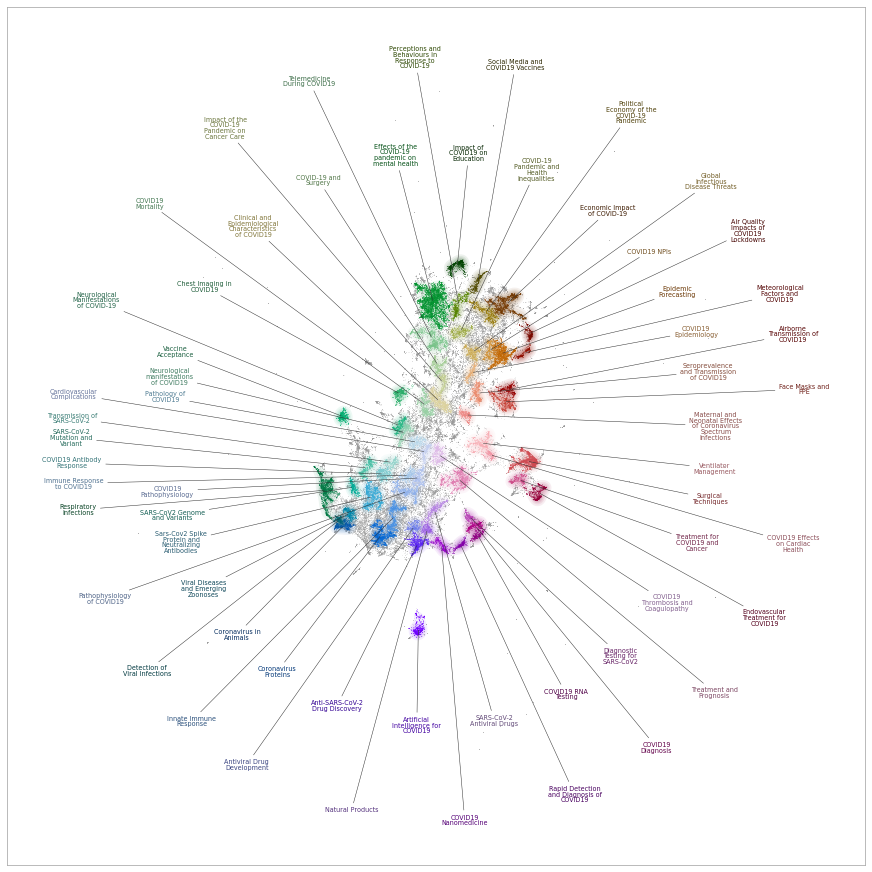

In [7]:
datamapplot.create_plot(cord19_data_map, cord19_labels, palette_hue_shift=160)

While rotating the palette around doesn't have a dramatic effect, it can allow some degree of control, especially since the exact palette generated is data driven, and shifting the hue can help to emphasise or de-emphasise clusters as you see fit.

A more dramatic effect on the auto-generated palette can be had with the ``palette_hue_radius_dependence``. When generating the palette from the data a small preference is given to ensuring more hue variation among points and clusters further from the center of the data map where clusters tend to  be more teightly packed into smaller arcs of area. The ``palette_hue_radius_dependence`` gives some control over this. A value of ``0.0`` will result in the palette ignoring the relative distances from the center, while a value of ``1.0`` provides the default setting. By making this value larger we can significantly adjust how the palette distributtes the hues. In the CORD-19 data map we see that there are far more labels and points further from the center in the north-south orientation. Thus if we set the ``palette_hue_radius_dependence`` *very* high we can force most of the hue variation to live there.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

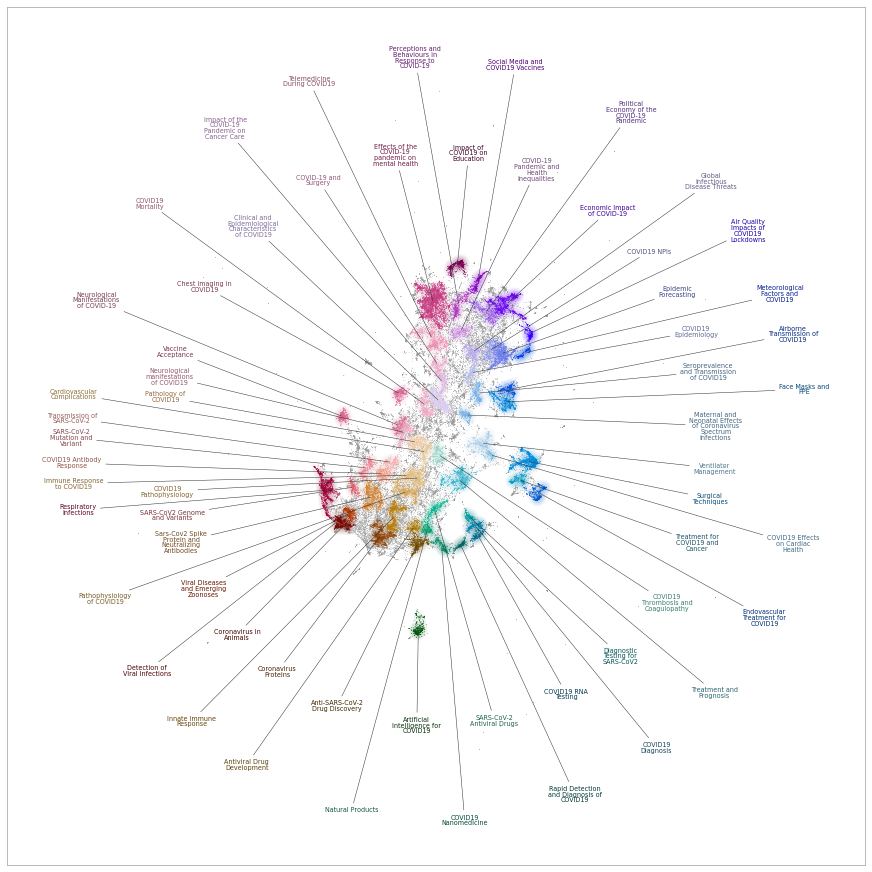

In [8]:
datamapplot.create_plot(cord19_data_map, cord19_labels, palette_hue_radius_dependence=4)

Depending on your data this may or may not be useful, but provides another degree of control over the auto-generated palette.

But what if you don't want to use the auto-generated palette, and have your own custom palette in mind? There are two levels of support for this. The simplest allows you to specify a matplotlib ``cmap`` and a palette will be generated based on that ``cmap``. Note that you will need to pass the actial ``cmap`` object, not merely the name. You can get the relevant objects by name using ``matplotlib.colormaps.get_cmap``:

In [9]:
cmap = matplotlib.colormaps.get_cmap("viridis")

We can see the colormap in a notebook by just using the cmap native display; for the online documentation the html representation doesn't work as well, but we can display the png version.

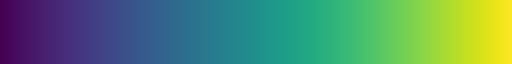

In [10]:
from IPython.display import display_png
display_png(cmap)

Since we know what we want we can also access the ``cmap`` directly from the ``matplotlib.cm`` module.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

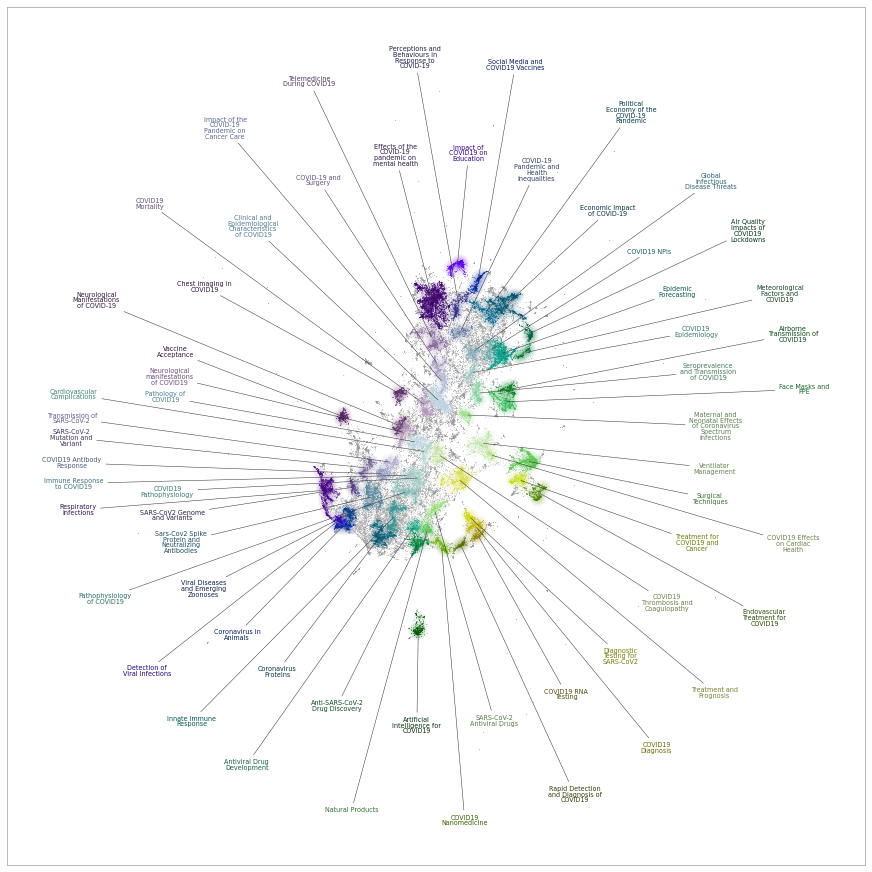

In [11]:
datamapplot.create_plot(cord19_data_map, cord19_labels, cmap=matplotlib.cm.viridis)

Note that the result uses colours *generated from* the specified ``cmap`` but includes colours not in the ``cmap`` in an effort to provide smoother transitions among colours over the whole map where possible. Also, since ``viridis`` is a linear colour map, and we need something cyclic (around a circle) DataMapPlot has made the ``cmap`` cyclic simply by relfecting it. If, on the other hand, we actually provide a true cyclic ``cmap`` it will work directly with that. A good source of cyclic colour maps (aside from the few provided in matplotlib) is the [colorcet package](https://colorcet.holoviz.org). Let's import that so we can use a cyclic example.

In [12]:
import colorcet

The colorcet package provides a number of cmaps, but let's use one of the basic cyclic ones -- the ``colorwheeel`` cmap.

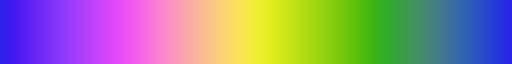

In [13]:
display_png(colorcet.cm.colorwheel)

And we can simply drop that in as our desired ``cmap`` and DataMapPlot will detect that it is cyclic and use it directly.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

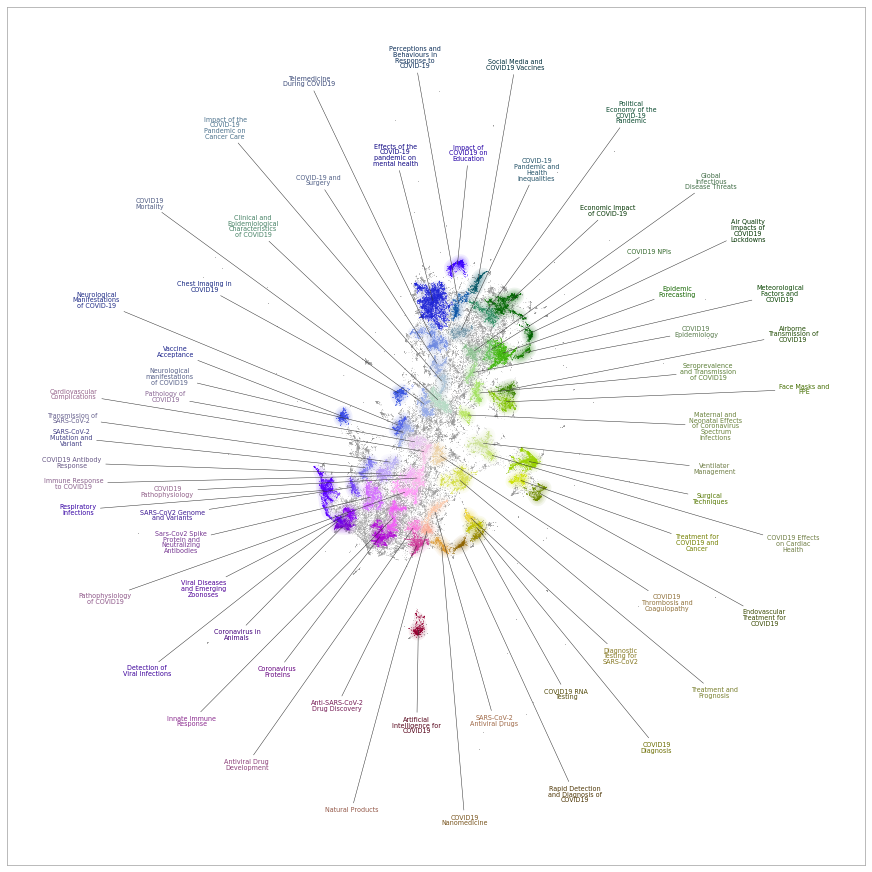

In [14]:
datamapplot.create_plot(cord19_data_map, cord19_labels, cmap=colorcet.cm.colorwheel)

As you can see we get a good looking result with a custom colour palette -- but it is still generating a palette from the ``colorwheel`` cmap. What if we want more control over the colours used?

For that case you can explicitly provide your own colour mapping from cluster labels to colours. To demonstrate that let's import seaborn to generate a palette of the right size, and get the ``rgb2hex`` function from matplotlib since DataMapPlot wants all colours as hex-strings and not the sRGB1 triples that seaborn provides by default.

In [15]:
import seaborn as sns
from matplotlib.colors import rgb2hex
import pandas as pd

At this point we can of course use any list of colours we want, but to keep things simple let's generate a palette using Viridis color palette. We need to have as many colours as we have distinct labels, so we'll use the length of the array given by applying ``np.unique`` to our label array. We can map ``rgb2hex`` over the result to ensure that all the colours in our list are hex-strings. To see what we'll get let's use seaborn's ``palplot`` to view the palette.

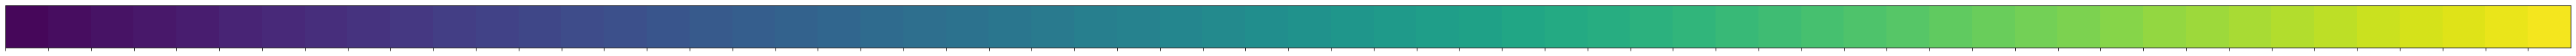

In [16]:
sns.palplot(list(map(rgb2hex, sns.color_palette("viridis", len(np.unique(cord19_labels))))))

We can now generate a custom colour map by making a dictionary keyed by the distinct labels from our dataset and values given by the hex-string representation of the colours from our viridis colour palette. A quick zip-and-dict operation will build that for us easily. After having built the dictionary itself we will specifically set the ``"Unlabelled"`` value in the dictionary to be a basic gray tone so that we are only colouring the clusters, and not all of the data.

In [17]:
custom_color_map = dict(
    zip(
        np.unique(cord19_labels), 
        map(rgb2hex, sns.color_palette("viridis", len(np.unique(cord19_labels))))
    )
)
custom_color_map["Unlabelled"] = "#cccccc"

Now that we have built a colur map in the correct format -- a dictionary mapping labels to hex-string colours -- we can apply that in DataMapPlot by using the ``label_color_map`` keyword argument.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

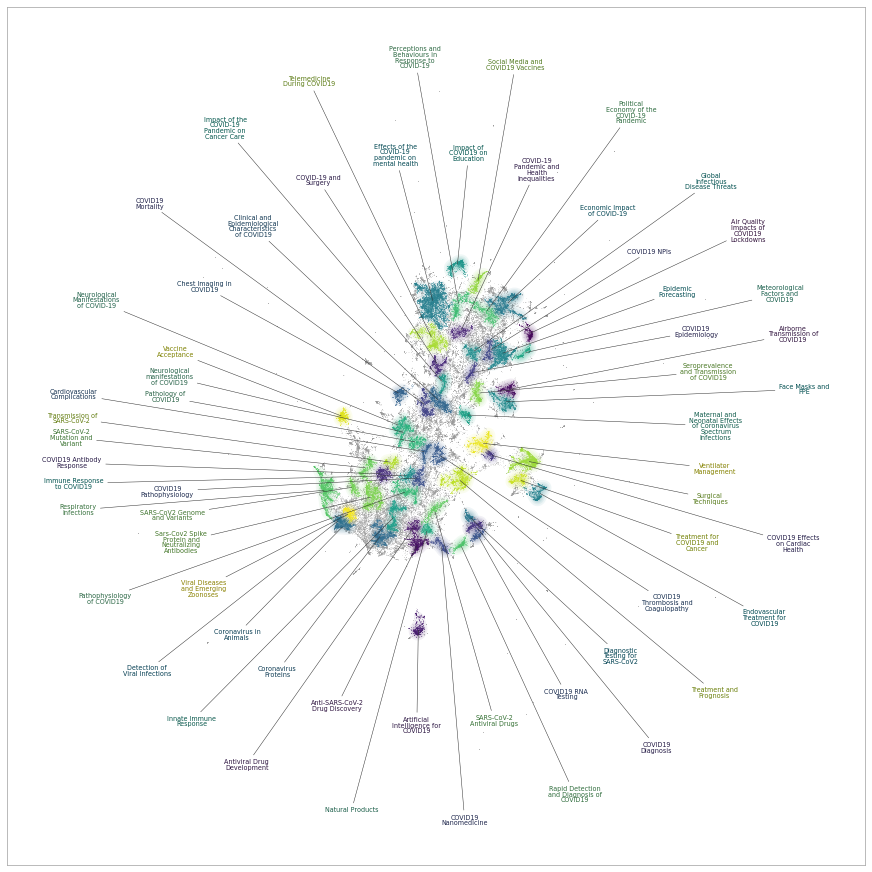

In [18]:
datamapplot.create_plot(cord19_data_map, cord19_labels, label_color_map=custom_color_map)

Note that since we built our colour map using the labels in alphabetical order (as output by ``np.unique``) there is no logic to how the colours end up on the map. A more careful construction of a color mapping would allow you to ensure that you get smooth transitions among colours if that is what you are after. It is also worth noting that the colours of the text labels adapt to follow the custom colour map.

Just to make the point, we can also generate a palette using a categorical colour palette such as ``"tab20"``, and everything will work largely as expected.

In [19]:
custom_color_map = dict(
    zip(
        np.unique(cord19_labels), 
        map(rgb2hex, sns.color_palette("tab20", len(np.unique(cord19_labels))))
    )
)
custom_color_map["Unlabelled"] = "#cccccc"

(<Figure size 864x864 with 1 Axes>, <Axes: >)

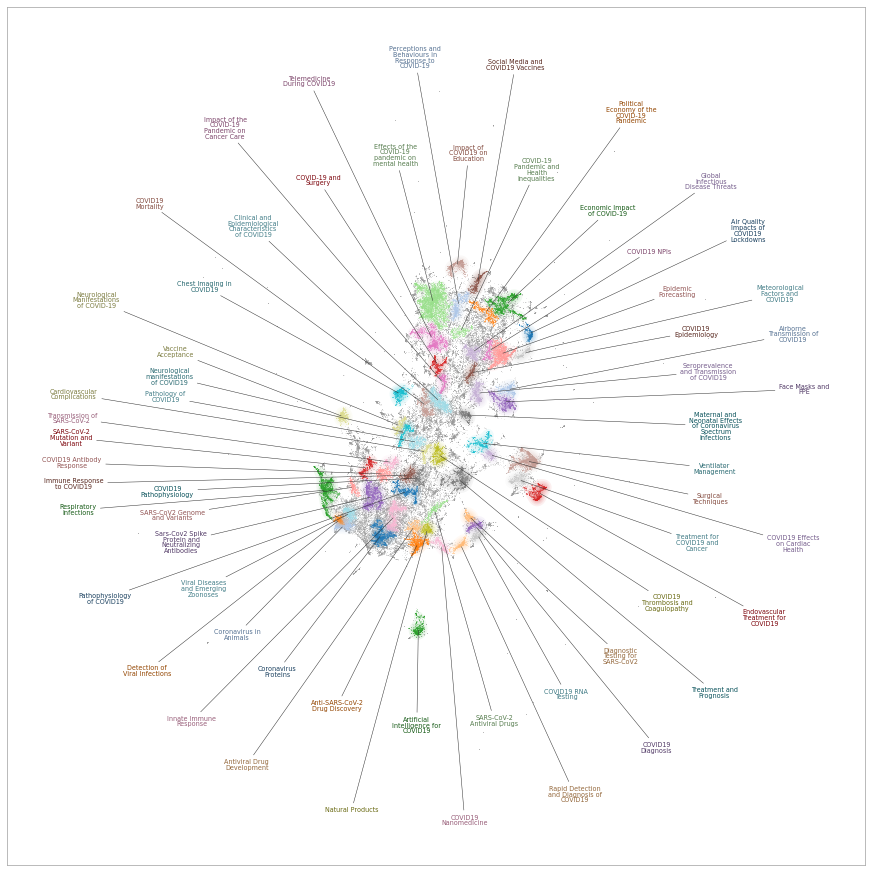

In [20]:
datamapplot.create_plot(cord19_data_map, cord19_labels, label_color_map=custom_color_map)

All of this presumes, however, that you wish to colour points by clusters (and labels). Perhaps you have some entirely different data that you wish to colour points by, but still want to th text labels to pick out and describe differtent regions of the data map. This is also possible, but it does defintiely require a little more work on your part. This next section will step you through the process with an example on the CORD-19 data where we wish to colur points by the primary field of study that the research paper comes from. To do that we'll have to start with that data -- which is available in the examples directory of the DataMapPlot repository.

In [21]:
field_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/CORD19-subset-field_of_study.npy"
)
research_field = np.load(io.BytesIO(field_file.content), allow_pickle=True)

Now we need a custom colour mapping from fields of research to colours; we want similar fields to have similar(ish) colours, so let's build a custom palette for that.

In [22]:
color_mapping = {}
color_mapping["Medicine"] = "#aaaaaa"
for key, color in zip(("Biology", "Chemistry", "Physics"), sns.color_palette("YlOrRd_r", 3)):
    color_mapping[key] = rgb2hex(color)
for key, color in zip(("Business", "Economics", "Political Science"), sns.color_palette("BuPu_r", 3)):
    color_mapping[key] = rgb2hex(color)
for key, color in zip(("Psychology", "Sociology", "Geography", "History"), sns.color_palette("YlGnBu_r", 4)):
    color_mapping[key] = rgb2hex(color)
for key, color in zip(("Computer Science", "Engineering", "Mathematics"), sns.color_palette("light:teal_r", 4)[:-1]):
    color_mapping[key] = rgb2hex(color)
for key, color in zip(("Environmental Science", "Geology", "Materials Science"), sns.color_palette("pink", 3), ):
    color_mapping[key] = rgb2hex(color)
for key, color in zip(("Art", "Philosophy", "Unknown"), sns.color_palette("bone", 3)):
    color_mapping[key] = rgb2hex(color)

To make use of colours not based on cluster labels we can't make use of ``create_plot``, but instead use the lower level ``render_plot`` function. That means we need to do some of the work that ``create_plot`` was doing for us automatically. First of all we need to find all the unique non-noise labels. Next we need to find a single location to point to for each cluster (we'll just use centroids here). Finally we need to have the text for the labels wrapped to fit a maximum width to make the text fit better.

In [23]:
import textwrap

cluster_label_vector = np.asarray(cord19_labels)
unique_non_noise_labels = [
    label for label in np.unique(cluster_label_vector) if label != "Unlabelled"
]
label_locations = np.asarray(
    [
        cord19_data_map[cluster_label_vector == i].mean(axis=0)
        for i in unique_non_noise_labels
    ]
)
label_text = [
    textwrap.fill(x, width=16, break_long_words=False)
    for x in unique_non_noise_labels
]

With that in hand we can now render the plot. The ``render_plot`` function takes slightly different arguments. We need to pass it the data map coordinates, an array of colours, one colour for each point, the text of the labels (this should be the text-wrapped versions), and the locations the labels should point to (the cluster centroids we just computed). It is also beneficial to set the point-size to zero if datashader is getting used, and since the colours no longer match the clusters the glow effect should be turned off since it will just be confusing. The result is a plot with points coloured as we wished, and text labels added in correctly, with the layout of the text labels handled for us automatically. All up this is definitely more work, but is still quite tractable if you really want to have your own color mapping per point. 

(<Figure size 864x864 with 1 Axes>, <Axes: >)

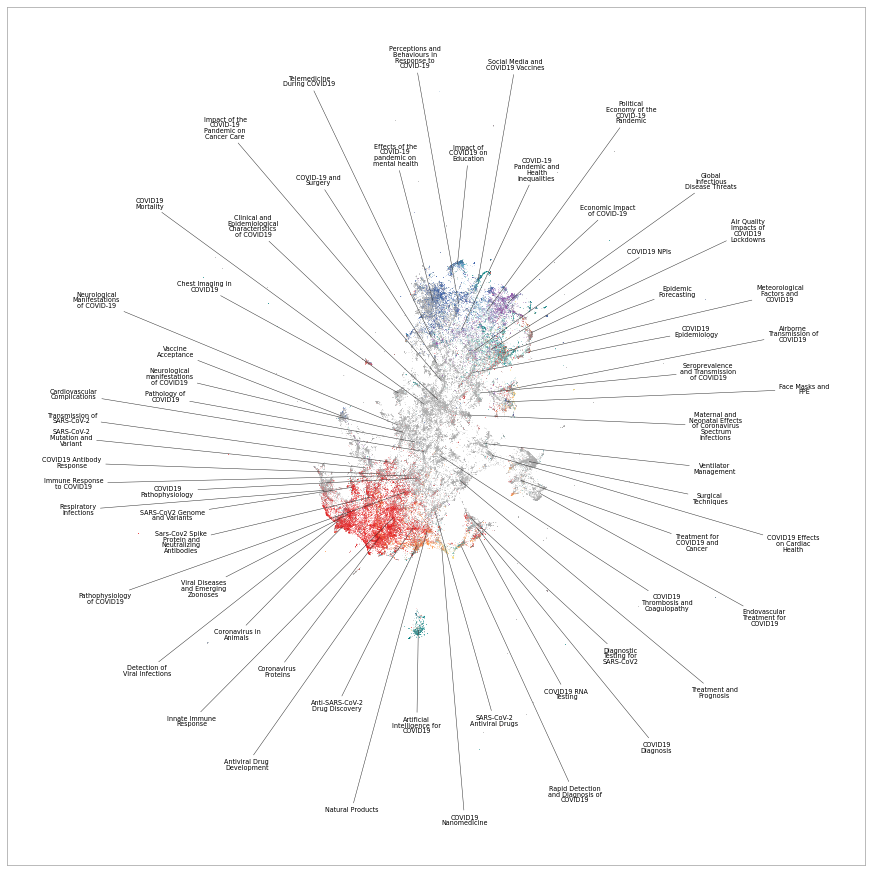

In [24]:
datamapplot.render_plot(
    cord19_data_map, 
    pd.Series(research_field).map(color_mapping).values, 
    label_text, 
    label_locations, 
    point_size=0, 
    add_glow=False
)

There is, of course, a lot more that can be done if you are willing to step down to the ``render_plot`` level, since that offers a great deal more control, but the details there will be left to the API documentation -- you can look there for further details.